# Lesson3: final part

[Lesson 3](https://github.com/BCDA-APS/use_bluesky/blob/master/notebooks/lesson3.ipynb) demonstrated how bluesky can show data as it is acquired.  This notebook provides a concise summary, which should be a good general starting point for users.

In [1]:
%matplotlib notebook
from bluesky.utils import install_nb_kicker
install_nb_kicker()

from ophyd import EpicsMotor
from ophyd.scaler import ScalerCH
from bluesky import RunEngine
import bluesky.plans as bp
from bluesky.callbacks.best_effort import BestEffortCallback
from apstools.devices import use_EPICS_scaler_channels

In [2]:
RE = RunEngine({})
RE.subscribe(BestEffortCallback())

P = "sky:"     # use your IOC's PV prefix here

m1 = EpicsMotor(f"{P}m1", name="m1")
scaler = ScalerCH(f"{P}scaler1", name="scaler")
m1.wait_for_connection()
scaler.wait_for_connection()
scaler.select_channels(None)

Count the detector (5 times)



Transient Scan ID: 1     Time: 2020-04-22 01:22:01
Persistent Unique Scan ID: '2ba4f735-7ef6-4471-82a6-63ea0e35314e'
New stream: 'primary'


<IPython.core.display.Javascript object>


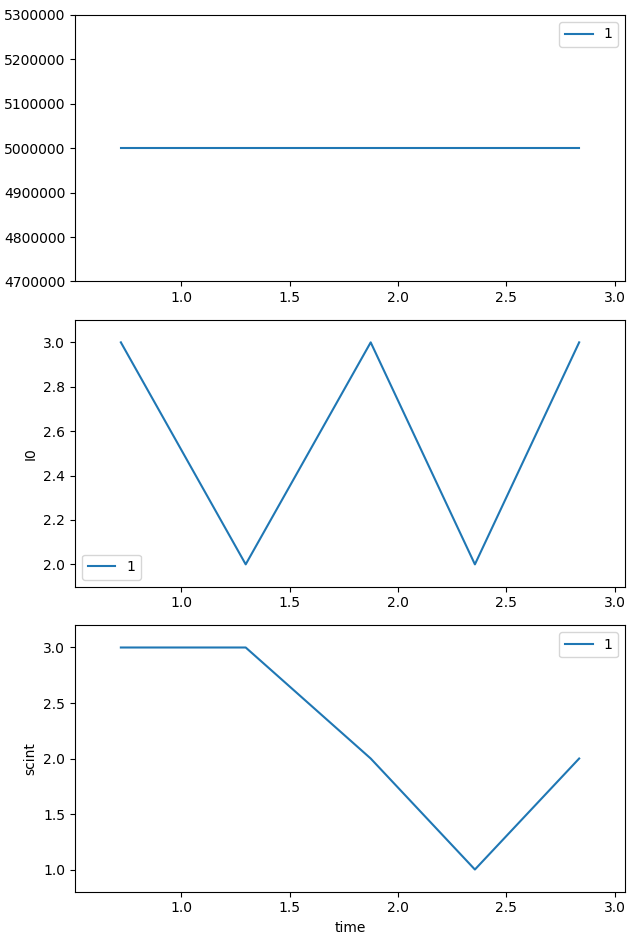

+-----------+------------+------------+------------+------------+
|   seq_num |       time |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+
|         1 | 01:22:02.2 |    5000000 |          3 |          3 |
|         2 | 01:22:02.8 |    5000000 |          2 |          3 |
|         3 | 01:22:03.3 |    5000000 |          3 |          2 |
|         4 | 01:22:03.8 |    5000000 |          2 |          1 |
|         5 | 01:22:04.3 |    5000000 |          3 |          2 |
+-----------+------------+------------+------------+------------+
generator count ['2ba4f735'] (scan num: 1)





('2ba4f735-7ef6-4471-82a6-63ea0e35314e',)

In [3]:
RE(bp.count([scaler], num=5))

Scan the scaler *vs.* the motor with 5 data points.



Transient Scan ID: 2     Time: 2020-04-22 01:22:17
Persistent Unique Scan ID: 'a74899d4-8f87-477e-8e64-664111429d3c'
New stream: 'primary'


<IPython.core.display.Javascript object>


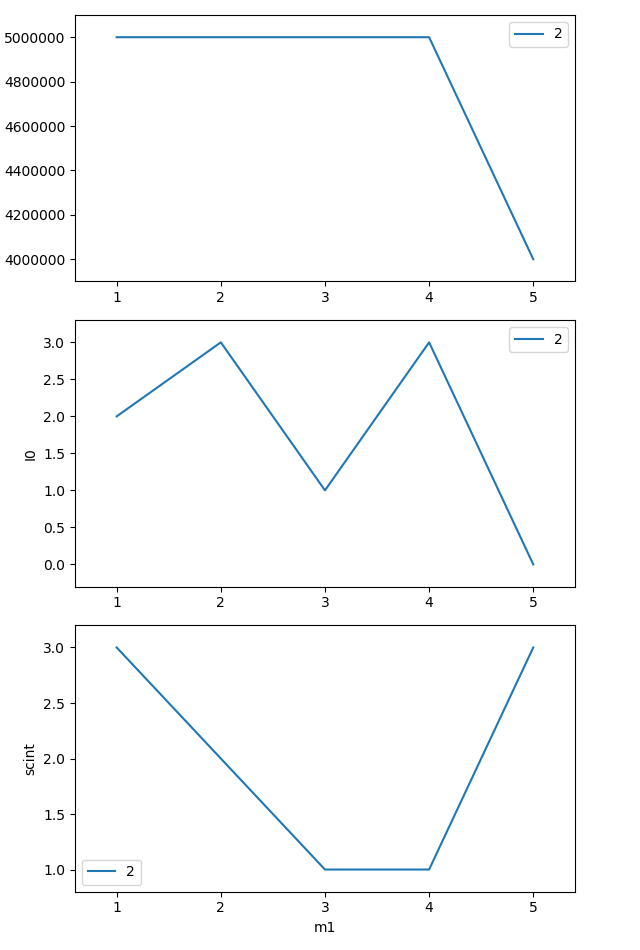

+-----------+------------+------------+------------+------------+------------+
|   seq_num |       time |         m1 |      clock |         I0 |      scint |
+-----------+------------+------------+------------+------------+------------+
|         1 | 01:22:22.1 |    1.00000 |    5000000 |          2 |          3 |
|         2 | 01:22:24.1 |    2.00000 |    5000000 |          3 |          2 |
|         3 | 01:22:26.0 |    3.00000 |    5000000 |          1 |          1 |
|         4 | 01:22:27.9 |    4.00000 |    5000000 |          3 |          1 |
|         5 | 01:22:29.7 |    5.00000 |    4000000 |          0 |          3 |
+-----------+------------+------------+------------+------------+------------+
generator scan ['a74899d4'] (scan num: 2)





('a74899d4-8f87-477e-8e64-664111429d3c',)

In [4]:
RE(bp.scan([scaler], m1, 1, 5, 5))